In [173]:
import numpy as np 
import matplotlib.pyplot as plt 

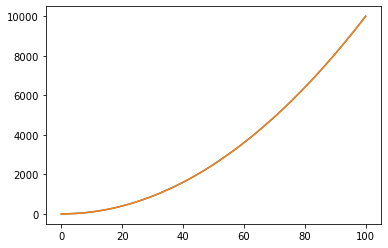

In [174]:
duration = 100
dt = 0.01 # seconds
time = np.linspace(0, duration, int(duration/dt))
def actual_position_signal(time):
    return time ** 2
def actual_velocity_signal(time):
    return  2 * time
def actual_acceleration_singal(time):
    return  2

noise_gaussian = np.random.normal(0,0.1, len(time))

position = [actual_position_signal(t) for t in time]
velocity = [actual_velocity_signal(t) for t in time]
acceleration = [actual_acceleration_singal(t) for t in time]

measured_position = [p + n for p, n in zip(position, noise_gaussian)]

plt.plot(time, measured_position)
plt.plot(time,position)

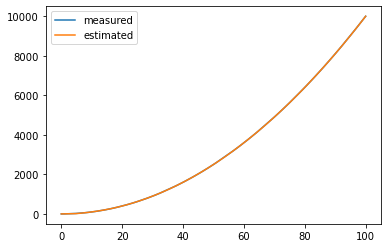

In [175]:
A = np.array([[1,dt, 0.5 * dt ** 2]
              ,[0,1,dt],
               [0,0,1]])

C = np.array([[1,0,0]])
D = np.array([[0,0,0]])

Q = np.array([[dt ** 4 / 4,dt ** 3 / 2,dt ** 2 / 2]
             ,[dt ** 3 / 2,dt ** 2,dt]
             ,[dt**2/2,dt,1]]) * 0.1
R = np.eye(1) * 1e5

P = np.eye(3)
x_pred = np.array([[0],[0],[0]])
p_pred = [0] * len(time)
x_est = np.array([[0],[2],[0]])

kalmanGains = [0] * len(time)

def updateKalmanFilter(x,i):
    global P, x_pred, p_pred, x_est
    x = np.array(x)
    x_pred = (A @ x) 
    P_pred = A @ P @ A.T + Q
    K = P_pred @ C.T @ np.linalg.inv(C @ P_pred @ C.T + R)
    kalmanGains[i] = K
    x_est = x_pred + K @ (measured_position[i] - C @ x_pred)
    P = (np.eye(3) - K @ C) @ P_pred
    return x_est

states = [updateKalmanFilter(x_est,i) for i in range(len(time))]

estimated_positions = [x[0] for x in states]
estimated_velocities = [x[1] for x in states]
estimated_accelerations = [x[2] for x in states]

plt.plot(time, measured_position, label='measured')
plt.plot(time, estimated_positions, label='estimated')
plt.legend()

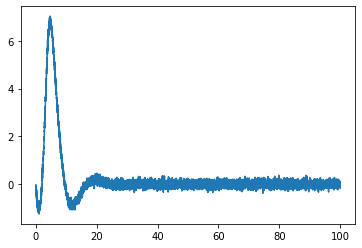

In [176]:
difference = [measured_position[i] - estimated_positions[i] for i in range(len(time))]
plt.plot(time, difference)

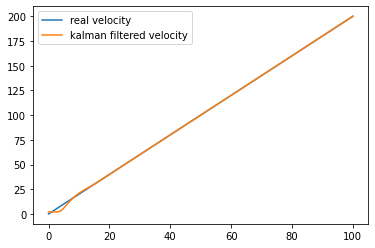

In [177]:
plt.plot(time, velocity, label='real velocity')
plt.plot(time, estimated_velocities, label='kalman filtered velocity')
plt.legend()


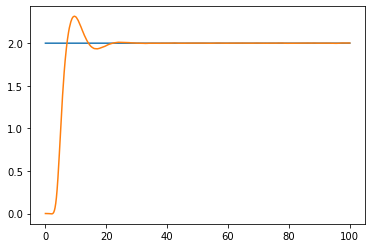

In [178]:
plt.plot(time, acceleration, label='measured')
plt.plot(time, estimated_accelerations, label='estimated')

In [179]:
# naive velocity and acceleration through numerical differentiation
naive_velocity = [np.diff(measured_position)[i] / dt for i in range(len(time)-1)]
naive_acceleration = [((naive_velocity[i + 1] - naive_velocity[i])  / dt) for i in range(len(time)-2)]

In [180]:
naive_acceleration

[-1046.84231486016,
 953.0072380436987,
 -1056.9746932248665,
 -107.77081191714908,
 590.6160898342808,
 -984.0902479666802,
 -446.2260246325382,
 927.7840286684801,
 -762.9279844881139,
 585.1393609237567,
 1734.2861117754298,
 -1653.9354998098918,
 -824.4474237874256,
 623.0691690057416,
 1265.491628081649,
 -2356.974302666668,
 3405.132043449205,
 -1420.6057262645322,
 -2159.802301235059,
 586.514189097763,
 2297.68603931542,
 178.89818171794687,
 -3746.2747055814084,
 2369.7713320662183,
 -1506.9453450643812,
 3643.396506986025,
 -3659.5086037811097,
 3908.5633795772833,
 -4319.5947658656,
 2252.7177025052692,
 -1819.1963139073557,
 2332.1940168909828,
 17.031447652575515,
 -2357.5870100737898,
 2606.9372555053014,
 -390.0391852325072,
 -1574.1036568905702,
 -233.51849668689331,
 -931.0565593101006,
 3597.120109515009,
 1298.7320661240105,
 -3549.823844445234,
 -1812.6568349995339,
 1348.8893202119546,
 4115.552933157455,
 -4845.988340311706,
 2025.6838733760378,
 -431.257025948740

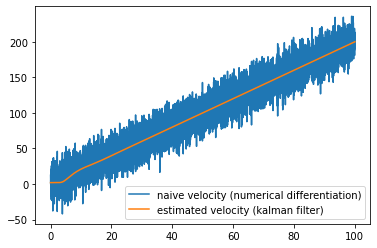

In [181]:
plt.plot(time[1:], naive_velocity, label='naive velocity (numerical differentiation)')
plt.plot(time, estimated_velocities, label='estimated velocity (kalman filter)')
plt.legend()

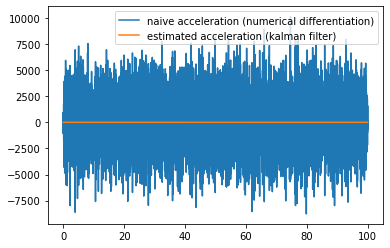

In [182]:
plt.plot(time[2:], naive_acceleration, label='naive acceleration (numerical differentiation)')
plt.plot(time, estimated_accelerations, label='estimated acceleration (kalman filter)')
plt.legend()

In [183]:
naive_acceleration

[-1046.84231486016,
 953.0072380436987,
 -1056.9746932248665,
 -107.77081191714908,
 590.6160898342808,
 -984.0902479666802,
 -446.2260246325382,
 927.7840286684801,
 -762.9279844881139,
 585.1393609237567,
 1734.2861117754298,
 -1653.9354998098918,
 -824.4474237874256,
 623.0691690057416,
 1265.491628081649,
 -2356.974302666668,
 3405.132043449205,
 -1420.6057262645322,
 -2159.802301235059,
 586.514189097763,
 2297.68603931542,
 178.89818171794687,
 -3746.2747055814084,
 2369.7713320662183,
 -1506.9453450643812,
 3643.396506986025,
 -3659.5086037811097,
 3908.5633795772833,
 -4319.5947658656,
 2252.7177025052692,
 -1819.1963139073557,
 2332.1940168909828,
 17.031447652575515,
 -2357.5870100737898,
 2606.9372555053014,
 -390.0391852325072,
 -1574.1036568905702,
 -233.51849668689331,
 -931.0565593101006,
 3597.120109515009,
 1298.7320661240105,
 -3549.823844445234,
 -1812.6568349995339,
 1348.8893202119546,
 4115.552933157455,
 -4845.988340311706,
 2025.6838733760378,
 -431.257025948740

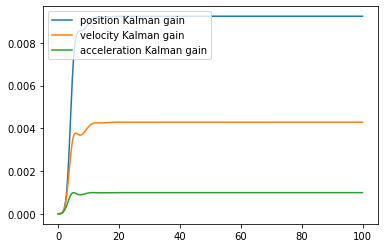

In [185]:
# plot kalman gains
positionKalmanGain = [kalmanGains[i][0,0] for i in range(len(time))]
velocityKalmanGain = [kalmanGains[i][1,0] for i in range(len(time))]
accelerationKalmanGain = [kalmanGains[i][2,0] for i in range(len(time))]
plt.plot(time, positionKalmanGain, label='position Kalman gain')
plt.plot(time, velocityKalmanGain, label='velocity Kalman gain')
plt.plot(time, accelerationKalmanGain, label='acceleration Kalman gain')
plt.legend()